## RiskApi Demo notebook
#### for this demo to work the user should be runing the RiskApi localy
#### to do so go to the directory containig the file RiskApi.py and run it with the comand 
#### "python RiskApi.py"

In [1]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
import json

#### Download and display images downloaded using the bing maps API

In [2]:
def getImageBing(latitude,longitude):
    key = "Aqk4d8d5q_eWvI3oGYPNI-NdIuS5fEt3U-AnDWxNAzyM2Dn_v2vn2BbgD_8F-jIh"
    link = f"https://dev.virtualearth.net/REST/v1/Imagery/Map/Aerial/{latitude},{longitude}/19?mapSize=500,500&key={key}"
    buffer = requests.get(link).content
    img = cv2.imdecode(np.frombuffer(buffer, np.uint8), cv2.IMREAD_UNCHANGED)
    
    return img

def show_image(im,title):
  f,ax = plt.subplots(1,1,figsize=(16,6))

  ax.imshow(im)
  ax.axis('off')
  f.suptitle(title)
  plt.show()

#### Call the RiskAPI to get the accident risk in a urban area of the Braga district

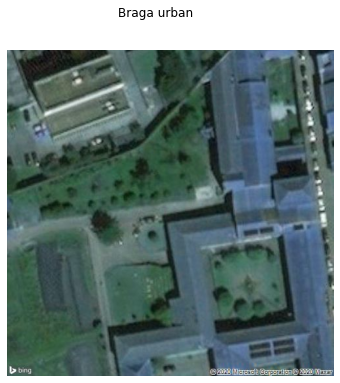

In [3]:
lat,lon = (41.5454,-8.4265)

img = getImageBing(lat,lon)
show_image(img,"Braga urban")

In [4]:
response = requests.get(f"http://127.0.0.1:5000/risk_prediction_lat={lat}_lon={lon}")
print(json.dumps(response.json(),indent = 4)) [0-3]

{
    "low accuracy": "1",
    "detailed accuracy": "1"
}


#### Call the RiskAPI to get the accident risk in a rural area of the Braga district

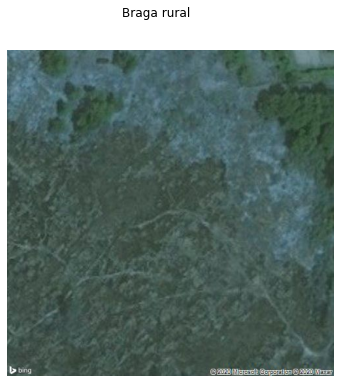

In [5]:
lat,lon = (41.54,-8.46)

img = getImageBing(lat,lon)
show_image(img,"Braga rural")

In [6]:
response = requests.get(f"http://127.0.0.1:5000/risk_prediction_lat={lat}_lon={lon}")
print(json.dumps(response.json(),indent = 4))

{
    "low accuracy": "0",
    "detailed accuracy": "0"
}


#### Call the RiskAPI to get the accident risk in a urban area of the Lisbon district

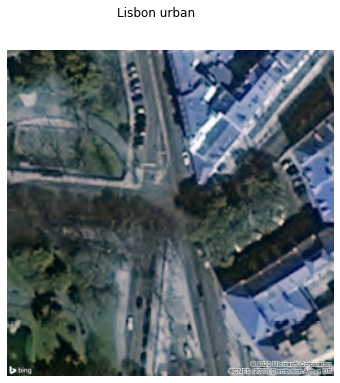

In [7]:
lat,lon = (38.7223,-9.1393)

img = getImageBing(lat,lon)
show_image(img,"Lisbon urban")

In [8]:
response = requests.get(f"http://127.0.0.1:5000/risk_prediction_lat={lat}_lon={lon}")
print(json.dumps(response.json(),indent = 4))

{
    "low accuracy": "1",
    "detailed accuracy": "1"
}


 #### Call the RiskAPI to get the accident risk in a rural area of the Lisbon district

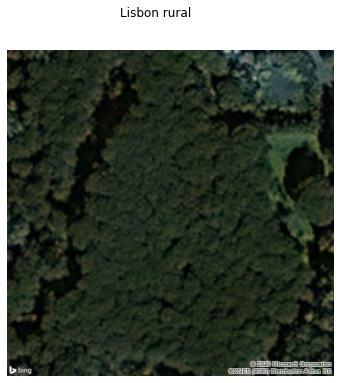

In [9]:
lat,lon = (38.723,-9.193)

img = getImageBing(lat,lon)
show_image(img,"Lisbon rural")

In [10]:
response = requests.get(f"http://127.0.0.1:5000/risk_prediction_lat={lat}_lon={lon}")
print(json.dumps(response.json(),indent = 4))

{
    "low accuracy": "0",
    "detailed accuracy": "0"
}
